In [218]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Import csv

## Main import

In [219]:
with open('../data/ESP_PUBLIC.IDENTITE_ARBRE.csv', newline='', encoding='utf-8-sig') as csvfile:
    # use "," separator to generate column value as list element
    # cs.reader return a class object of "_csv.reader"
    dataTemp = csv.reader(csvfile, delimiter=',')
    
    # Use list() to convert the csv object into a list, of list, depending on how the object is built
    # Hard to understand how list(csv_object) behaves 
    data = list(dataTemp)

## Copy the dataset to advoid re-import

In [220]:
dataset = data

## Correct last row


In [221]:
def add_missing_value(dataset:list) -> list:
    datasetCopy = dataset
    
    if len(datasetCopy[len(datasetCopy)-1]) == 31:
        datasetCopy[len(datasetCopy)-1].insert(0, "MISSING")
        print(f"Added a value in : {datasetCopy[len(datasetCopy)-1]}")
    else:
        #print(f"{datasetCopy[len(datasetCopy)-1]} was already added...")
        print(f"{len(datasetCopy)-1} is the last rows of the dataset and should start with 'MISSING' value")

    return datasetCopy
print(add_missing_value(dataset)[len(dataset)-1])

Added a value in : ['MISSING', 'ESP14073', 'ESP14073', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP151', 'Arbre de voirie', 'ESP336', 'R M Gontard angle M Deprez', '2', 'AR14073', 'Prunus', 'serrulata', '', 'Arbre adulte', '', '', '1995', '', '', '', '', '', '', '', '', '', '', 'Grenoble Alpes Métropole', '{"type":"Point","coordinates":[5.72422659146747,45.1920566916671]}']
['MISSING', 'ESP14073', 'ESP14073', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP151', 'Arbre de voirie', 'ESP336', 'R M Gontard angle M Deprez', '2', 'AR14073', 'Prunus', 'serrulata', '', 'Arbre adulte', '', '', '1995', '', '', '', '', '', '', '', '', '', '', 'Grenoble Alpes Métropole', '{"type":"Point","coordinates":[5.72422659146747,45.1920566916671]}']


## Utils

In [222]:
def get_header(data:list) -> list:
    if len(data) > 0:
        return data[0]
    else:
        raise ValueError("The dataset sent is empty...")

In [223]:
def get_dict_colName_colNum(data:list) -> dict:
    dictTemp = {}
    
    for el in get_header(data):
        dictTemp[el] = get_header(data).index(el)
        
    return dictTemp
# print(get_dict_colName_colNum(dataset))

In [224]:
def is_in_header(colName:str, data:list) -> bool:
    return colName in get_header(data)
# print(is_in_header("GENRE_DESC", dataset))

In [225]:
def average(col:list) -> float:
    for el in col:
        if type(el) is not float:
            raise TypeError("The list sent doesn't have float or contains empty string")
    return sum(col)/len(col)

# -----------------------------------------------------------------------------------------------------------

# Iteration 1 : Main computation

# -----------------------------------------------------------------------------------------------------------

## Afficher deux premieres lignes

In [226]:
# Slice and extract the first two list ie the first two lignes
header = get_header(dataset)
lignes2 = dataset[0:2]

specDataset = {
    "rows" : len(dataset),
    "columns" : len(dataset[0])
}

## Afficher colonne n°2

In [227]:
# We see that to access the row is [i] after lignes2. 
# Then we have the list corresponding to the row i-1 (start from 0)
# In this list, we use [i] to acces the i element corresponding to the column
ligne1_col2 = lignes2[0][1]
ligne2_col2 = lignes2[1][1]

In [228]:
print(ligne1_col2 + " : " + ligne2_col2)

CODE : ESP29285


## Get 50 first & last

In [229]:
# Should be called when having a list coming from : get_col_values()
def extract_50(col:list) -> list:
    if len(col) > 100:
        return col[:50]+ ["------> more values"] + col[len(col)-50:]
    else:
        raise ValueError(f"List {col} has less than 100 elements")
# extract_50(colList)

## Infos année plantation data

In [230]:
print(get_header(dataset))

['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE', 'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE', 'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE', 'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU', 'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE', 'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE', 'GeoJSON']


In [231]:
def get_col_value_from_name(colName:str, data:list) -> str:
    
    if is_in_header(colName, data):
        return get_dict_colName_colNum(data)[colName]
    
# print(get_col_value_from_name(colName="CODE_PARENT", data=dataset))

In [232]:
def get_col_values(colName:str, data:list) -> list:
    
    col = [el[get_col_value_from_name(colName, data)] for el in data]
    
    return col
# print(get_col_values("ANNEEDEPLANTATION", dataset))

### Trees column parsing utils

In [233]:
colToStudy = "ANNEEDEPLANTATION"

In [234]:
colList = get_col_values(colToStudy, dataset)
colYearTree = colList
print("there is --> " + str(len(colList)) + " <-- trees studied")

there is --> 31620 <-- trees studied


In [235]:
def count_empty_value(col:list) -> int:
    
    emptyList = [el for el in col if not el]
    
    return len(emptyList)

In [236]:
print("there is --> " + str(count_empty_value(colList)) + " <-- empty values in " + colToStudy )

there is --> 1438 <-- empty values in ANNEEDEPLANTATION


In [237]:
def remove_empty(col:list) -> list:
    return [el for el in col if el]

In [238]:
def get_min(col:list) -> int:
    
    colValues = remove_empty(col)
    
    # Slice to get rid off the header
    return float(min(colValues[1:]))

In [239]:
def get_max(col:list) -> int:
    
    colValues = remove_empty(col)
    
    # Slice to get rid off the header
    return float(max(colValues[1:]))

### Count trees for each year in dataset

In [240]:
def count_specific_value_in_col(value:str, col:list) -> int:
    
    valuesCorresponding = [el for el in col if str(el) == str(value)]  
    
    return len(valuesCorresponding)

In [241]:
valueToFind = "1994"
print(f"There was {count_specific_value_in_col(valueToFind, colList)} trees planted in {valueToFind}")

There was 252 trees planted in 1994


In [242]:
print(f"The oldest year of plantation is : {get_min(colList)}")
print(f"The last year of plantation is : {get_max(colList)}")

The oldest year of plantation is : 1900.0
The last year of plantation is : 2021.0


### Count trees for each year in dataset

In [243]:
# This method compute for each year the number of trees planted
# Then it compute the average taking into account only the trees where the year is known
def average_trees_planted(col:list) -> dict:
    cleanList = remove_empty(col[1:])
    removeDuplicate = set(cleanList)
    
    nbTreesPerYear = [float(count_specific_value_in_col(el,col)) for el in removeDuplicate]
    print(f"Nombre d'annees connues ou des arbres ont été planté : {len(removeDuplicate)}")
    return round(average(nbTreesPerYear),2)

In [244]:
print(f"La moyenne n°1 des arbres plantés est : {average_trees_planted(colList)}")

Nombre d'annees connues ou des arbres ont été planté : 65
La moyenne n°1 des arbres plantés est : 464.32


In [245]:
# This function compute the average taking into account
# The total number of trees in the dataset
# The max and min year known

def rought_average(col:list) -> float:
    # remove one on the global size due to header
    nbArbre = float(len(col[1:]))
    # add +1 to take into account the full 2021 year
    interval = float(get_max(col)-get_min(col)+1)
    
    print(f"Diviser total arbre : {nbArbre} par intervalle d'annee etudier {int(get_min(col))} - {int(get_max(col))}")
    
    return round(nbArbre/interval,2)

In [246]:
print(f"La moyenne n°2 des arbres plantés est : {rought_average(colList)}")

Diviser total arbre : 31619.0 par intervalle d'annee etudier 1900 - 2021
La moyenne n°2 des arbres plantés est : 259.17


### Make tuple (year : nb_arbre)

In [247]:
def make_tuple_year_nbArbre(col:list) -> list:
    cleanList = remove_empty(col[1:])
    removeDuplicate = set(cleanList) 
    
    return [(el, count_specific_value_in_col(el, col)) for el in removeDuplicate]

In [248]:
# Sort the list of tuples (year, value) by year
def sort_by_year(tupleList:list) -> list:
    return sorted(tupleList, key=lambda x:x[0], reverse=False)

In [249]:
treeTupleList = make_tuple_year_nbArbre(colList)
sortedTreeTupleList = sort_by_year(treeTupleList)
# treeTupleList

In [250]:
sortedTreeTupleList

[('1900', 4),
 ('1924', 11),
 ('1944', 27),
 ('1950', 402),
 ('1955', 118),
 ('1959', 16),
 ('1960', 701),
 ('1964', 6),
 ('1965', 734),
 ('1966', 85),
 ('1967', 53),
 ('1968', 111),
 ('1969', 314),
 ('1970', 1366),
 ('1971', 67),
 ('1972', 318),
 ('1973', 33),
 ('1974', 287),
 ('1975', 3631),
 ('1976', 898),
 ('1977', 602),
 ('1978', 847),
 ('1979', 324),
 ('1980', 1445),
 ('1981', 600),
 ('1982', 359),
 ('1983', 295),
 ('1984', 647),
 ('1985', 870),
 ('1986', 221),
 ('1987', 701),
 ('1988', 235),
 ('1989', 299),
 ('1990', 248),
 ('1991', 140),
 ('1992', 221),
 ('1993', 135),
 ('1994', 252),
 ('1995', 738),
 ('1996', 363),
 ('1997', 231),
 ('1998', 205),
 ('1999', 564),
 ('2000', 427),
 ('2001', 1488),
 ('2002', 319),
 ('2003', 341),
 ('2004', 341),
 ('2005', 384),
 ('2006', 582),
 ('2007', 138),
 ('2008', 211),
 ('2009', 647),
 ('2010', 452),
 ('2011', 494),
 ('2012', 310),
 ('2013', 319),
 ('2014', 886),
 ('2015', 1012),
 ('2016', 516),
 ('2017', 622),
 ('2018', 775),
 ('2019', 88),

### Etude des Maires

In [251]:
maire = [['Rivail', 1904,1908],['Viallet', 1908,1910],['Cornier', 1910,1919],['Mistral', 1919,1932],['Martin', 1932,1935],['Cocat', 1935,1944],['Lafleur', 1944,1945],['Martin2', 1945,1947],['Bally', 1947,1948],['Perinetti', 1948,1949],['Martin3', 1949,1959],['Michallon', 1959,1965],['Dubedout', 1965,1983],['Carignon', 1983,1995],['Destot', 1995,2014],['Piolle', 2014,2021]]
maireDict = {el[0]:[el[1],el[2]] for el in maire}
maireDict

{'Rivail': [1904, 1908],
 'Viallet': [1908, 1910],
 'Cornier': [1910, 1919],
 'Mistral': [1919, 1932],
 'Martin': [1932, 1935],
 'Cocat': [1935, 1944],
 'Lafleur': [1944, 1945],
 'Martin2': [1945, 1947],
 'Bally': [1947, 1948],
 'Perinetti': [1948, 1949],
 'Martin3': [1949, 1959],
 'Michallon': [1959, 1965],
 'Dubedout': [1965, 1983],
 'Carignon': [1983, 1995],
 'Destot': [1995, 2014],
 'Piolle': [2014, 2021]}

In [328]:
def number_of_tree_per_maire(maire:dict, tupleListArbre:list) -> int:
    
    dictTemp = {}
    
    for el in tupleListArbre:
        for maire in maireDict.keys():
            #print(f"Le maire {key} a reigné sur Grenoble de {maireDict[key]}")
            #print(type(maireDict[key][0]))
            #print(type(el[0]))
            #print(f"{maireDict[maire][0]} <= {int(el[0])} < {maireDict[maire][1]} ????")
            if maireDict[maire][0] <= int(el[0])<maireDict[maire][1]:
                #print(f"The Maire {maire} planted --> {el[1]} <-- trees in the year {el[0]} during is mandat of [{maireDict[maire][0]},{maireDict[maire][1]}]")        
                
                if maire in dictTemp:
                    dictTemp[maire] += el[1]
                else:
                    dictTemp[maire] = el[1]

                
    return dictTemp

In [329]:
maireTreeDict = number_of_tree_per_maire(maireDict, sortedTreeTupleList)
maireTreeDict

{'Mistral': 11,
 'Lafleur': 27,
 'Martin3': 520,
 'Michallon': 723,
 'Dubedout': 12074,
 'Carignon': 4264,
 'Destot': 8554,
 'Piolle': 4001}

In [254]:
def get_max_maire_tree(dictMaire:dict) -> str:
    return max(dictMaire, key=dictMaire.get)

In [255]:
max_maire = get_max_maire_tree(maireTreeDict)
print(f"The Maire who planted the more trees is --> {max_maire} <-- with a number of --> {maireTreeDict[max_maire]} <--")

The Maire who planted the more trees is --> Dubedout <-- with a number of --> 12074 <--


In [256]:
def get_maire_from_year(year:int, maireDict:dict) -> str:
    
    for maire in maireDict.keys():
        if int(maireDict[maire][0]) <= int(year) < int(maireDict[maire][1]):
            return maire
    return ""
        
def name_of_maire_per_tree(colYear:list, maireDict:dict) -> list:
    
    maireList = []
    for year in colYear[1:]:
        if not year:
            
            maireList.append("")
            
        else:
            maireList.append(get_maire_from_year(int(year), maireDict))

    
    maireList.insert(0, "Maire")
    return maireList

## Etude botanique

In [257]:
colToStudy = "GENRE_BOTA"
colBota = get_col_values(colToStudy, dataset)

In [258]:
print("there is --> " + str(count_empty_value(colBota)) + " <-- empty values in " + colToStudy )

there is --> 933 <-- empty values in GENRE_BOTA


In [259]:
colBota = get_col_values(colToStudy, dataset)
#colList

In [260]:
valueToFind = ""
print(f"There was {count_specific_value_in_col(valueToFind, colBota)} trees of type : {valueToFind}")

There was 933 trees of type : 


In [261]:
def concat_year_type(colListArbre:list, colListYear:list) -> list:
    if not len(colListArbre) == len(colListYear):
        raise ValueError("The two colone studied are not the same length")
    else:
        listTemp = []
        for year, treeType in zip(colListArbre, colListYear):
            tupleTemp = (year, treeType)
            listTemp.append(tupleTemp)
        
        return listTemp

In [262]:
yearBotaList = concat_year_type(colYearTree, colBota)
sortedyearBotaList = sort_by_year(yearBotaList)

## Build column of -31000 rows before group_by 

In [263]:
dataset
rawData = add_missing_value(dataset)

31619 is the last rows of the dataset and should start with 'MISSING' value


In [264]:
columnNameDict = get_dict_colName_colNum(rawData)
#columnNameDict

In [265]:
colAnneePlantation = get_col_values(colName="ANNEEDEPLANTATION", data=rawData)
colGenreBota = get_col_values(colName="GENRE_BOTA", data=rawData)
colMaires = name_of_maire_per_tree(colYear=colAnneePlantation, maireDict=maireDict)

In [266]:
count_specific_value_in_col(value="Platanus", col=colGenreBota)
len(set(colGenreBota[1:]))

120

In [267]:
def concat_year_maire_type(colYear:list, colMaire:list, colArbreType:list) -> list:
    if not (len(colYear) == len(colMaire) == len(colArbreType) ):
        raise ValueError("The two colone studied are not the same length")
    else:
        listTemp = []
        for year, maire, treeType in zip(colYear, colMaire, colArbreType):
            tupleTemp = (year, maire, treeType)
            listTemp.append(tupleTemp)
        
        return listTemp

In [268]:
table = concat_year_maire_type(colAnneePlantation, colMaires, colGenreBota)

In [269]:
sortTable = sort_by_year(table)

## Bar plot

In [270]:
def cleanDataset(table:list) -> list:
    tableCopy = []

    for row in table:

        if len(row[0]) == 0 or len(row[1]) == 0 or len(row[2])== 0:
            pass
        else:
            tableCopy.append(row)
    
    
    return tableCopy

In [271]:
cleanTable = cleanDataset(sortTable)
print(f"The new cleaned table is size of : {len(cleanTable)}. We remove {len(sortTable)-len(cleanTable)} containing empty rows")

The new cleaned table is size of : 30139. We remove 1481 containing empty rows


In [272]:
def extract_column(colNum:int, table:list) -> list:
    col = []
    for row in table[1:]:
        col.append(row[2])
        
    return col

In [273]:
typeOfTree = extract_column(2, cleanTable)
setOfTypeOfTree = set(typeOfTree)

In [274]:
def concat_by_type(table:list) -> list:
    tuples_list = table[1:]
    unique_tuples = {}
    
    for t in tuples_list:
        if t not in unique_tuples:
            unique_tuples[t] = 1
        else:
            unique_tuples[t] += 1
           
    return unique_tuples

In [275]:
concatDictByType = concat_by_type(cleanTable)

# -------------------------------------------------------------------------------------------

### Build Bar Dict

In [276]:
def cumsum(l:list) -> list:
    sm=0
    cumList = []
    for i in l:
        sm=sm+i
        cumList.append(sm)
    return cumList

In [330]:
treePlanted = [el[1] for el in sortedTreeTupleList]

In [331]:
years = [el[0] for el in sortedTreeTupleList]

In [310]:
maireTreeDict

{'Mistral': 11,
 'Lafleur': 27,
 'Martin3': 520,
 'Michallon': 723,
 'Dubedout': 12074,
 'Carignon': 4264,
 'Destot': 8554,
 'Piolle': 4001}

In [287]:
## Compute the bins : ie the length of the ,andat for each maire
#bins = [mandat[1]-mandat[0] for mandat in maireDict.values()]
## Now that you have the length of the mandat, you have to cumul them in order to have the starting year
## In the good place. 
## Meaning a mandat of 2 years starts after a one of 4 : It will finishes at +6
#bins = np.cumsum(bins) + 1904
## Now that cumulative years are ok, we need to shift the very first starting point as the mandat starts
## in 1904 and not in 4
##bins = bins + list(maireDict.values())[0][0]
#bins = np.insert(bins, 0, 1904)
#bins

array([1904, 1908, 1910, 1919, 1932, 1935, 1944, 1945, 1947, 1948, 1949,
       1959, 1965, 1983, 1995, 2014, 2021])

In [305]:
# Compute the bins : ie the length of the ,andat for each maire
# We have 17 values in bins -> 16 interval of 16 maires
bins = [mandat[1] for mandat in maireDict.values()]
bins.insert(0,list(maireDict.values())[0][0])
bins


[1904,
 1908,
 1910,
 1919,
 1932,
 1935,
 1944,
 1945,
 1947,
 1948,
 1949,
 1959,
 1965,
 1983,
 1995,
 2014,
 2021]

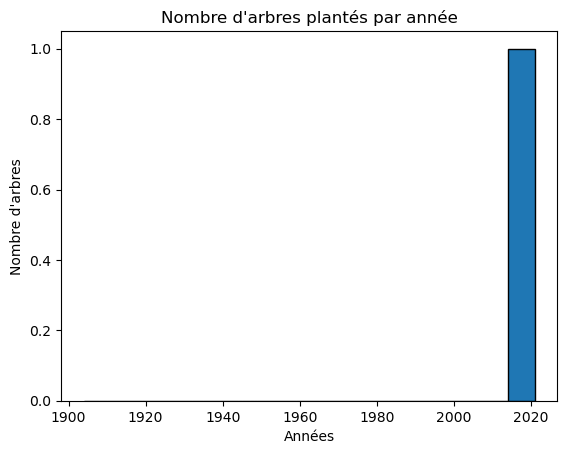

In [318]:
plt.hist(treePlantedCum, bins ,edgecolor = 'Black')

plt.xlabel('Années')
plt.ylabel('Nombre d\'arbres')
plt.title('Nombre d\'arbres plantés par année')
#plt.legend()
plt.show()